# 景氣信號燈擇時策略｜結合大盤ETF與美債ETF的資產配置

## 前言

在投資領域中，**景氣循環**向來是一個重要的參考依據。無論是總體經濟的波動、企業獲利的起伏，還是市場投資氣氛的演變，都在不同的景氣階段呈現出鮮明的差異。因此，若能掌握景氣循環的動向，便可協助投資人更精準地調整資產配置，並在投資市場中取得相對優勢。

在臺灣，政府透過**景氣燈號**的發布，提供了簡潔易懂的經濟狀態指標。景氣燈號共分為五種顏色，分別代表不同的景氣階段：

- 🔵 **藍燈**：景氣低迷，經濟處於衰退階段  
- 🔷 **黃藍燈**：景氣轉弱，經濟可能進一步惡化  
- 🟢 **綠燈**：經濟穩定，處於正常擴張階段  
- 🔶 **黃紅燈**：景氣過熱，經濟可能面臨過度擴張風險  
- 🔴 **紅燈**：景氣過熱，潛藏泡沫或修正風險  

此一燈號系統由國發會根據多項經濟指標計算得出，能夠將複雜的總體經濟資訊轉化為一般大眾易於理解的形式。若能適時運用這些指標，並結合量化投資策略加以驗證，投資人便可在經濟循環波動中，掌握更適切的進出場時機。

---

## 策略邏輯

從景氣週期的角度來看，市場每隔幾年就會經歷一次**熊市**，造成短期內資產顯著縮水。因此，我們期望從**景氣信號燈**中獲取進出場依據，使即使是投資大盤 ETF（如 0050），也能透過**擇時避險**，減少風險、保留報酬。

本策略的邏輯如下：

- ✅ **進場時機**：景氣燈號為「藍燈」時買入股票，視為相對低基期  
- ❌ **出場時機**：景氣燈號為「紅燈」時賣出股票，避免高點修正風險  

這樣的設計目標為：

- **避開熊市期間的持股虧損**
- **保留多頭行情的主要漲幅**
- **在空倉期間利用美債 ETF 對抗通膨，避免持有現金的損失**

---

## 交易標的與操作細節

- 📌 **股票部位**：`0050`（台灣市值型 ETF，大盤代表性最強）
- 📌 **債券部位**：`00865B`（美國一年期短債 ETF）

**選擇理由如下：**

- `0050` 是最常見、流動性佳的台股 ETF，適合代表「大盤」表現
- `00865B` 採用**美國短債**，相較台債殖利率更高，且短債有保本特性，可提供一定利息收入、對抗通膨

---

本策略嘗試以**景氣指標進行動態資產配置**，驗證景氣燈號是否能提供有效的擇時依據，並優化大盤投資報酬與風險結構。


### 景氣信號燈、0050以及00865B價格的資料視覺化


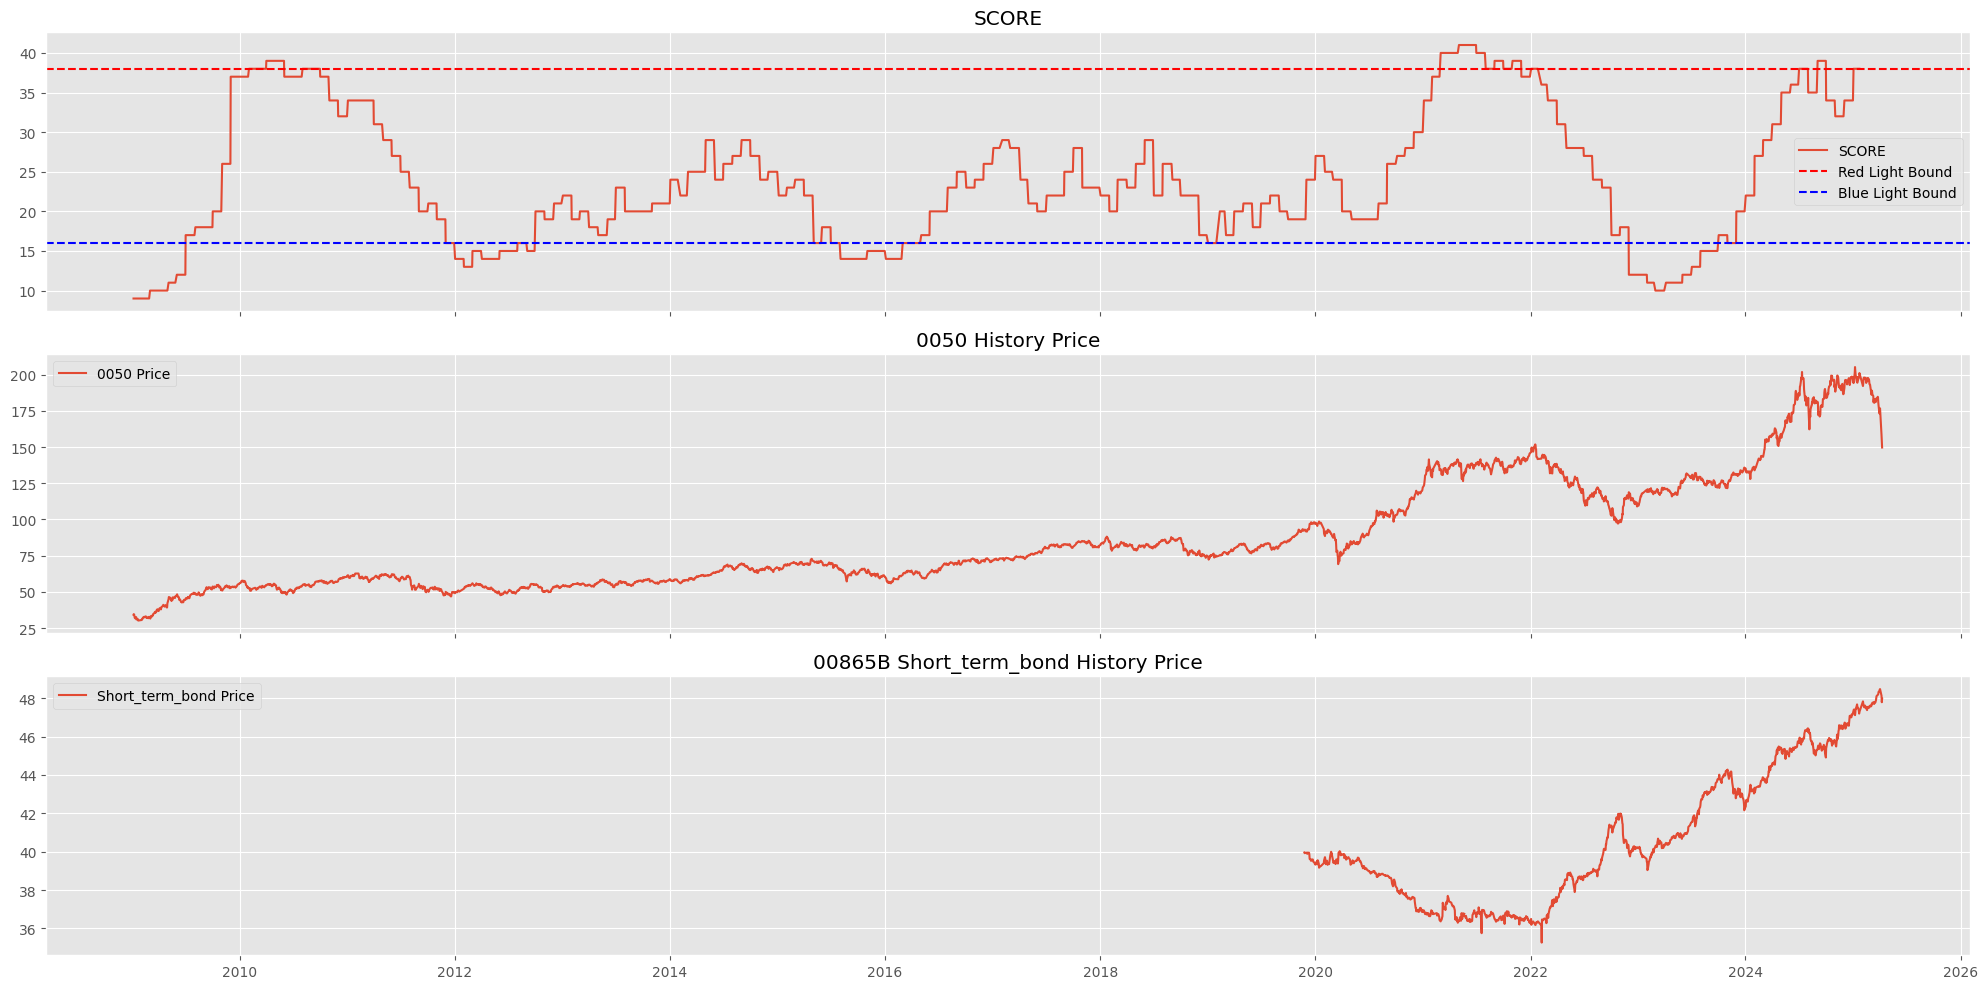

In [2]:
import pandas as pd

df = pd.read_csv('eco_data.csv')
df['mdate'] = pd.to_datetime(df['mdate'])
df['mdate'] = df['mdate'].dt.strftime('%Y-%m-%d')
df['mdate'] = pd.to_datetime(df['mdate'])


import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 10), sharex=True)
plt.style.use('ggplot')
axes[1].plot(df['mdate'], df['avgclsd'], label = '0050 Price')
axes[1].set_title(f'0050 History Price')
axes[1].legend()

axes[0].plot(df['mdate'], df['val_shifted'], label = 'SCORE')
axes[0].axhline(y = 38, label = 'Red Light Bound', color = 'red', linestyle = '--')
axes[0].axhline(y= 16, label = 'Blue Light Bound', color = 'blue', linestyle = '--')
axes[0].set_title(f'SCORE')
axes[0].legend()

axes[2].plot(df['mdate'], df['avgclsd_bond'], label = 'Short_term_bond Price')
axes[2].set_title(f'00865B Short_term_bond History Price')
axes[2].legend()

plt.tight_layout()
plt.show()

In [ ]:
import os
import tejapi
plt.rcParams['font.family'] = 'Arial'
tej_key = 'your key'
os.environ['TEJAPI_BASE'] = "https://api.tej.com.tw"
os.environ['TEJAPI_KEY'] = tej_key

from zipline.data.run_ingest import simple_ingest
from zipline.api import set_slippage, set_commission, set_benchmark,  symbol,  record
from zipline.api import order_target_percent, order_percent, order
from zipline.api import set_long_only, set_max_leverage


from zipline.finance import commission, slippage
from zipline import run_algorithm
pool = ['0050', 'IR0001', '00865B', '00687B','00664R']
start_date = '2009-01-01'
end_date = '2025-04-29'
start_ingest = start_date.replace('-', '')
end_ingest = end_date.replace('-', '')

simple_ingest(name = 'tquant' , tickers = pool , start_date = start_ingest , end_date = end_ingest)

print(pool)

Now ingesting data.


[2025-04-30 01:50:12.478360] INFO: zipline.data.bundles.core: Ingesting tquant.


Merging daily equity files:
Currently used TEJ API key call quota 13/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 57216/9223372036854775807 (0.0%)


[2025-04-30 01:50:14.483963] INFO: zipline.data.bundles.core: Ingest tquant successfully.


End of ingesting tquant.
Please call function `get_bundle(start_dt = pd.Timestamp('20090101', tz = 'utc'),end_dt = pd.Timestamp('20250429' ,tz = 'utc'))` in `zipline.data.data_portal` to check data.
Currently used TEJ API key call quota 13/9223372036854775807 (0.0%)
Currently used TEJ API key data quota 57216/9223372036854775807 (0.0%)
['0050', 'IR0001', '00865B', '00687B', '00664R']


進入景氣循環
Date: 2020-01-02, Score: 27.0, 買進 0050
Date: 2021-02-26, Score: 40.0, 賣出 0050
Date: 2021-02-26, Score: 40.0，買入債券避險
Date: 2022-11-30, Score: 12.0, 買進 0050
Date: 2022-11-30, Score: 12.0，賣出債券
Date: 2024-06-28, Score: 38.0, 賣出 0050
Date: 2024-06-28, Score: 38.0，買入債券避險


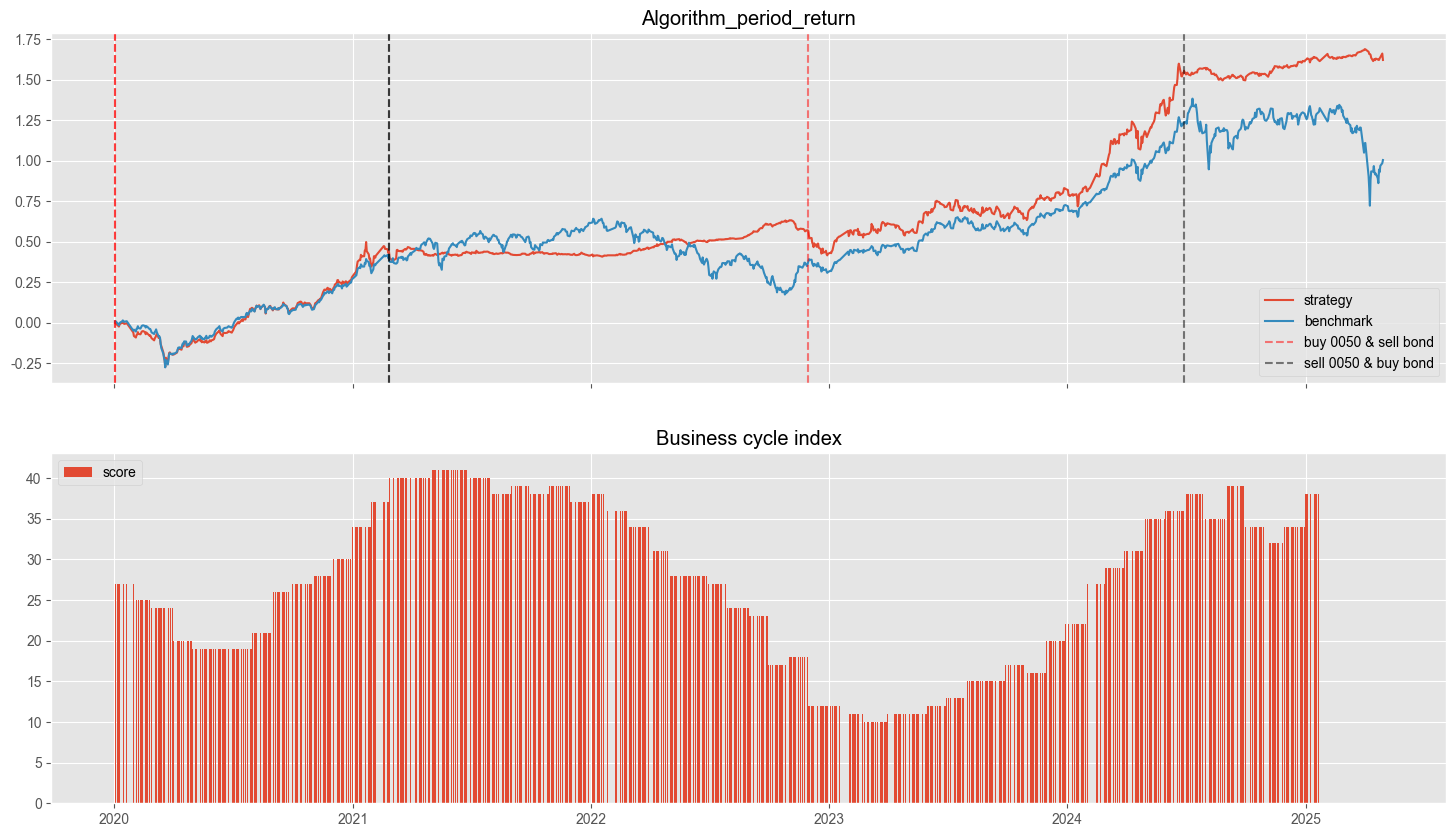

In [11]:

def initialize(context, pool = pool):

  set_slippage(slippage.TW_Slippage(spread = 0.3 , volume_limit = 1))
  set_commission(commission.Custom_TW_Commission(min_trade_cost=20, discount=1.0, tax = 0.003))
  set_benchmark(symbol('IR0001'))

  context.i = 0
  context.pool  = pool
  context.state = False
  context.score = None
  context.last_score = None
  context.hedge_state = None

  context.buy_date = []
  context.sell_date = []

  context.a = 0
  context.b = 0

  context.bond = symbol('00865B')
  context.stock = symbol('0050')


# short trem debt
def handle_data(context, data, score_data = df):
  backtest_date = data.current_dt.date()
  today_data = score_data[score_data['mdate'].shift(1) == pd.to_datetime(backtest_date)]
  context.last_score = context.score  # 記錄舊的 score

  if not today_data.empty:
    context.score = today_data['val_shifted'].iloc[-1]
  else:
    # 若無資料，就沿用舊的 score
    context.score = context.last_score

  record(score=context.score)

  if context.score <= 16 and context.state == False:
    order_target_percent(context.stock, 1.0)
    print(f"Date: {backtest_date}, Score: {context.score}, 買進 0050")
    context.buy_date.append(pd.to_datetime(backtest_date))
    context.state = True

    if context.hedge_state == True:
      order_target_percent(context.bond, 0)
      print(f"Date: {backtest_date}, Score: {context.score}，賣出債券")
      context.hedge_state = False


  if context.score >= 38 and context.state == True:
    order_target_percent(context.stock, 0)
    print(f"Date: {backtest_date}, Score: {context.score}, 賣出 0050")
    context.sell_date.append(pd.to_datetime(backtest_date))
    context.state = False

    if context.hedge_state == False :
      order_target_percent(context.bond, 1.0)
      print(f"Date: {backtest_date}, Score: {context.score}，買入債券避險")
      context.hedge_state = True



  if context.score > 16 and context.score < 38 and context.a == 0:
    context.a = 1
    print('進入景氣循環')
    if context.state == False:
      order_target_percent(context.stock, 1.0)
      print(f"Date: {backtest_date}, Score: {context.score}, 買進 0050")
      context.buy_date.append(pd.to_datetime(backtest_date))
      context.state = True

  # 因為 00685B 從 2019-11-25 才開始被交易
  if pd.to_datetime(backtest_date) >= pd.to_datetime('2019-11-25') and context.b == 0:
    context.b = 1
    context.hedge_state = False

# Cash
def handle_data_2(context, data, score_data = df):
  backtest_date = data.current_dt.date()
  today_data = score_data[score_data['mdate'].shift(1) == pd.to_datetime(backtest_date)]
  context.score = today_data['val_shifted'].iloc[-1]

  record(score=context.score)
  

  if context.score <= 16 and context.state == False:
    order_target_percent(context.stock, 1.0)
    print(f"Date: {backtest_date}, Score: {context.score}, 買進 0050")
    context.buy_date.append(pd.to_datetime(backtest_date))
    context.state = True

  if context.score >= 38 and context.state == True:
    order_target_percent(context.stock, 0)
    print(f"Date: {backtest_date}, Score: {context.score}, 賣出 0050")
    context.sell_date.append(pd.to_datetime(backtest_date))
    context.state = False

  if context.score > 16 and context.score < 38 and context.a == 0:
    context.a = 1
    print('進入景氣循環')
    if context.state == False:
      order_target_percent(context.stock, 1.0)
      print(f"Date: {backtest_date}, Score: {context.score}, 買進 0050")
      context.buy_date.append(pd.to_datetime(backtest_date))
      context.state = True

# long term debt
def handle_data_3(context, data, score_data = df):
  context.bond = symbol('00687B')
  backtest_date = data.current_dt.date()
  today_data = score_data[score_data['mdate'].shift(1) == pd.to_datetime(backtest_date)]
  context.score = today_data['val_shifted'].iloc[-1]

  record(score=context.score)

  if context.score <= 16 and context.state == False:
    order_target_percent(context.stock, 1.0)
    print(f"Date: {backtest_date}, Score: {context.score}, 買進 0050")
    context.buy_date.append(pd.to_datetime(backtest_date))
    context.state = True

    if context.hedge_state == True:
      order_target_percent(context.bond, 0)
      print(f"Date: {backtest_date}, Score: {context.score}，賣出債券")
      context.hedge_state = False


  if context.score >= 38 and context.state == True:
    order_target_percent(context.stock, 0)
    print(f"Date: {backtest_date}, Score: {context.score}, 賣出 0050")
    context.sell_date.append(pd.to_datetime(backtest_date))
    context.state = False

    if context.hedge_state == False :
      order_target_percent(context.bond, 1.0)
      print(f"Date: {backtest_date}, Score: {context.score}，買入債券避險")
      context.hedge_state = True



  if context.score > 16 and context.score < 38 and context.a == 0:
    context.a = 1
    print('進入景氣循環')
    if context.state == False:
      order_target_percent(context.stock, 1.0)
      print(f"Date: {backtest_date}, Score: {context.score}, 買進 0050")
      context.buy_date.append(pd.to_datetime(backtest_date))
      context.state = True

  # 因為 00685B 從 2019-11-25 才開始被交易
  if pd.to_datetime(backtest_date) >= pd.to_datetime('2019-11-25') and context.b == 0:
    context.b = 1
    context.hedge_state = False

# 0050 反一
def handle_data_4(context, data, score_data = df):
  context.bond = symbol('00664R')
  backtest_date = data.current_dt.date()
  today_data = score_data[score_data['mdate'].shift(1) == pd.to_datetime(backtest_date)]
  context.score = today_data['val_shifted'].iloc[-1]

  record(score=context.score)

  if context.score <= 16 and context.state == False:
    order_target_percent(context.stock, 1.0)
    print(f"Date: {backtest_date}, Score: {context.score}, 買進 0050")
    context.buy_date.append(pd.to_datetime(backtest_date))
    context.state = True

    if context.hedge_state == True:
      order_target_percent(context.bond, 0)
      print(f"Date: {backtest_date}, Score: {context.score}，賣出 0050 反一")
      context.hedge_state = False


  if context.score >= 38 and context.state == True:
    order_target_percent(context.stock, 0)
    print(f"Date: {backtest_date}, Score: {context.score}, 賣出 0050")
    context.sell_date.append(pd.to_datetime(backtest_date))
    context.state = False

    if context.hedge_state == False :
      order_target_percent(context.bond, 1.0)
      print(f"Date: {backtest_date}, Score: {context.score}，買入 0050反一")
      context.hedge_state = True



  if context.score > 16 and context.score < 38 and context.a == 0:
    context.a = 1
    print('進入景氣循環')
    if context.state == False:
      order_target_percent(context.stock, 1.0)
      print(f"Date: {backtest_date}, Score: {context.score}, 買進 0050")
      context.buy_date.append(pd.to_datetime(backtest_date))
      context.state = True

  # 因為 00685B 從 2019-11-25 才開始被交易
  if pd.to_datetime(backtest_date) >= pd.to_datetime('2019-11-25') and context.b == 0:
    context.b = 1
    context.hedge_state = False

# 50:50 (0050 短債)
def handle_data_5(context, data, score_data = df):

  backtest_date = data.current_dt.date()
  today_data = score_data[score_data['mdate'].shift(1) == pd.to_datetime(backtest_date)]
  context.score = today_data['val_shifted'].iloc[-1]

  record(score=context.score)

  if context.score <= 16 and context.state == False:
    order_target_percent(context.stock, 1.0)
    print(f"Date: {backtest_date}, Score: {context.score}, 買進 0050")
    context.buy_date.append(pd.to_datetime(backtest_date))
    context.state = True

    if context.hedge_state == True:
      order_target_percent(context.bond, 0)
      print(f"Date: {backtest_date}, Score: {context.score}，賣出債券")
      context.hedge_state = False


  if context.score >= 38 and context.state == True:
    order_target_percent(context.stock, 0.5)
    print(f"Date: {backtest_date}, Score: {context.score}, 賣出 0050")
    context.sell_date.append(pd.to_datetime(backtest_date))
    context.state = False

    if context.hedge_state == False :
      order_target_percent(context.bond, 0.5)
      print(f"Date: {backtest_date}, Score: {context.score}，買入債券避險")
      context.hedge_state = True



  if context.score > 16 and context.score < 38 and context.a == 0:
    context.a = 1
    print('進入景氣循環')
    if context.state == False:
      order_target_percent(context.stock, 1.0)
      print(f"Date: {backtest_date}, Score: {context.score}, 買進 0050")
      context.buy_date.append(pd.to_datetime(backtest_date))
      context.state = True

  # 因為 00685B 從 2019-11-25 才開始被交易
  if pd.to_datetime(backtest_date) >= pd.to_datetime('2019-11-25') and context.b == 0:
    context.b = 1
    context.hedge_state = False

def handle_data_6(context, data, score_data = df):
  if context.i == 0:
    order_target_percent(context.stock, 1.0)

  context.i += 1
  backtest_date = data.current_dt.date()
  today_data = score_data[score_data['mdate'].shift(1) == pd.to_datetime(backtest_date)]
  context.score = today_data['val_shifted'].iloc[-1]
  record(score=context.score)


def analyze(context, perf):
  plt.style.use('ggplot')
  fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 10), sharex=True)


  axes[0].plot(perf.index, perf['algorithm_period_return'], label = 'strategy')
  axes[0].plot(perf.index, perf['benchmark_period_return'], label = 'benchmark')

  for idx, i in enumerate(context.buy_date):
    if idx == 0:
      axes[0].axvline(x = i, color = 'red', label = 'buy 0050 & sell bond', linestyle = '--', alpha = 0.5)
    axes[0].axvline(x = i, color = 'red', linestyle = '--', alpha = 0.5)

  for idx, i in enumerate(context.sell_date):
    if idx == 0:
      axes[0].axvline(x = i, color = 'black', label = 'sell 0050 & buy bond', linestyle = '--', alpha = 0.5)
    axes[0].axvline(x = i, color = 'black', linestyle = '--', alpha = 0.5)

  axes[0].set_title(f'Algorithm_period_return')
  axes[0].legend()  

  axes[1].bar(perf.index, perf['score'], label='score')
  axes[1].set_title('Business cycle index')
  axes[1].legend()
  
  plt.show()



results = run_algorithm(
            start = pd.Timestamp('2020-01-01', tz = 'utc'),
            end = pd.Timestamp('2025-04-29', tz = 'utc'),
            initialize = initialize,
            handle_data = handle_data,
            analyze = analyze,
            bundle = 'tquant',
            capital_base = 1e5)

## 回測結果與分析

上圖為策略回測的累積報酬率圖表，圖中有標示哪個時期持有 0050，哪個時期持有短天期美債。

從整體績效來看，策略整體報酬率贏過大盤非常多的，即便不算上 2025-04 出的美國關稅政策造成的股價下跌，策略依舊贏過大盤 25% 左右的報酬率。

再從細部去查看：

首先 2021 年至 2022 年末，大盤是先盤整一年後進入下跌段，綜合起來這兩年大盤整體報酬略為下跌，同時這段期間策略是持有美國短天期國債 ETF，雖然漲幅不大但能夠穩定拿到利息收入的同時避開了股市下跌的波動度，這也是當初我們期望策略效果。

接下來看到 2024/06 的時期，策略是賣出 0050 並且買入短債，並且在持有債券期間大盤經歷了兩次的重大下跌：

- 第一次為 2024/08 的日圓平倉套利事件  
- 第二次為 2025/04 的川普關稅政策  

雖然這是從後設角度去看事情，但我們可以了解當時的整體市場估值本來就推得蠻高的，即便沒有這些政策出現，股市創高的動力也有限。

---

此策略只使用了**景氣信號燈**的資訊，投資人可以自行在交易邏輯上加入自己偏好的景氣指標來創建屬於自己的景氣週期策略，像是：

- VIX（波動率指數）  
- 基準利率（央行利率政策）  
- 採購經理人指數（PMI）

來強化策略回測的**擇時能力**，並且獲取**長期穩定的報酬**。


Start date,2020-01-02
End date,2025-04-29
Total months,61
,Backtest
Annual return,20.721%
Cumulative returns,162.214%
Annual volatility,14.795%
Sharpe ratio,1.35
Calmar ratio,0.75
Stability,0.90
Max drawdown,-27.601%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,27.60,2020-01-14,2020-03-19,2020-07-13,117
1,13.26,2022-11-02,2022-12-29,2023-05-25,132
2,10.11,2021-01-21,2021-01-29,2022-04-28,305
3,7.70,2024-04-09,2024-04-22,2024-05-13,24
4,7.05,2023-07-14,2023-10-31,2023-11-15,85


Top 10 long positions of all time,max
sid,
0050,104.20%
00865B,100.91%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
0050,104.20%
00865B,100.91%


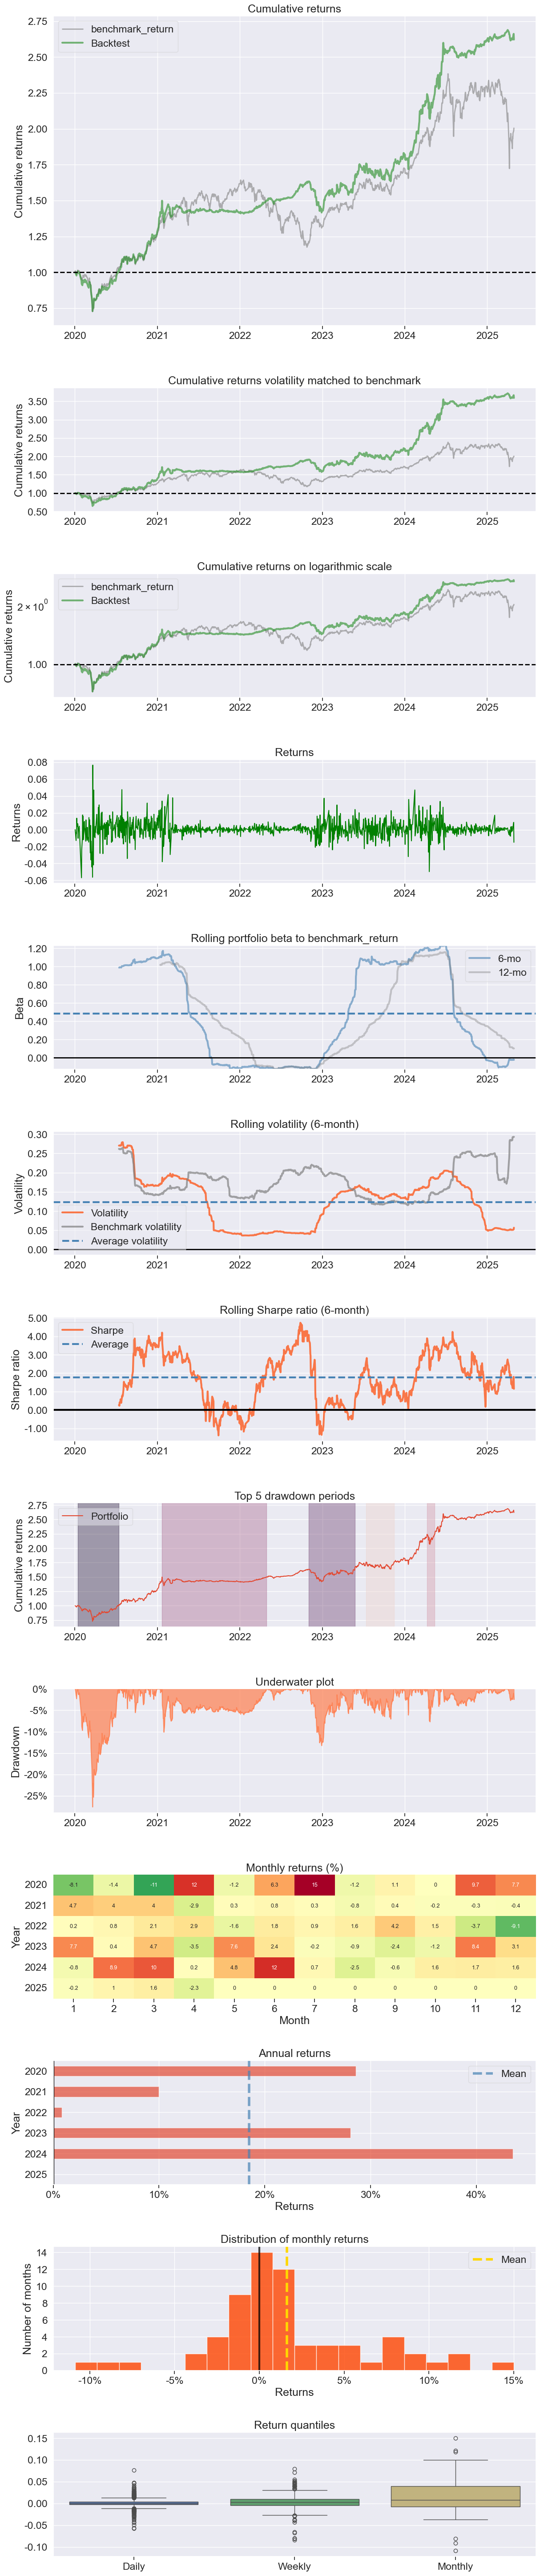

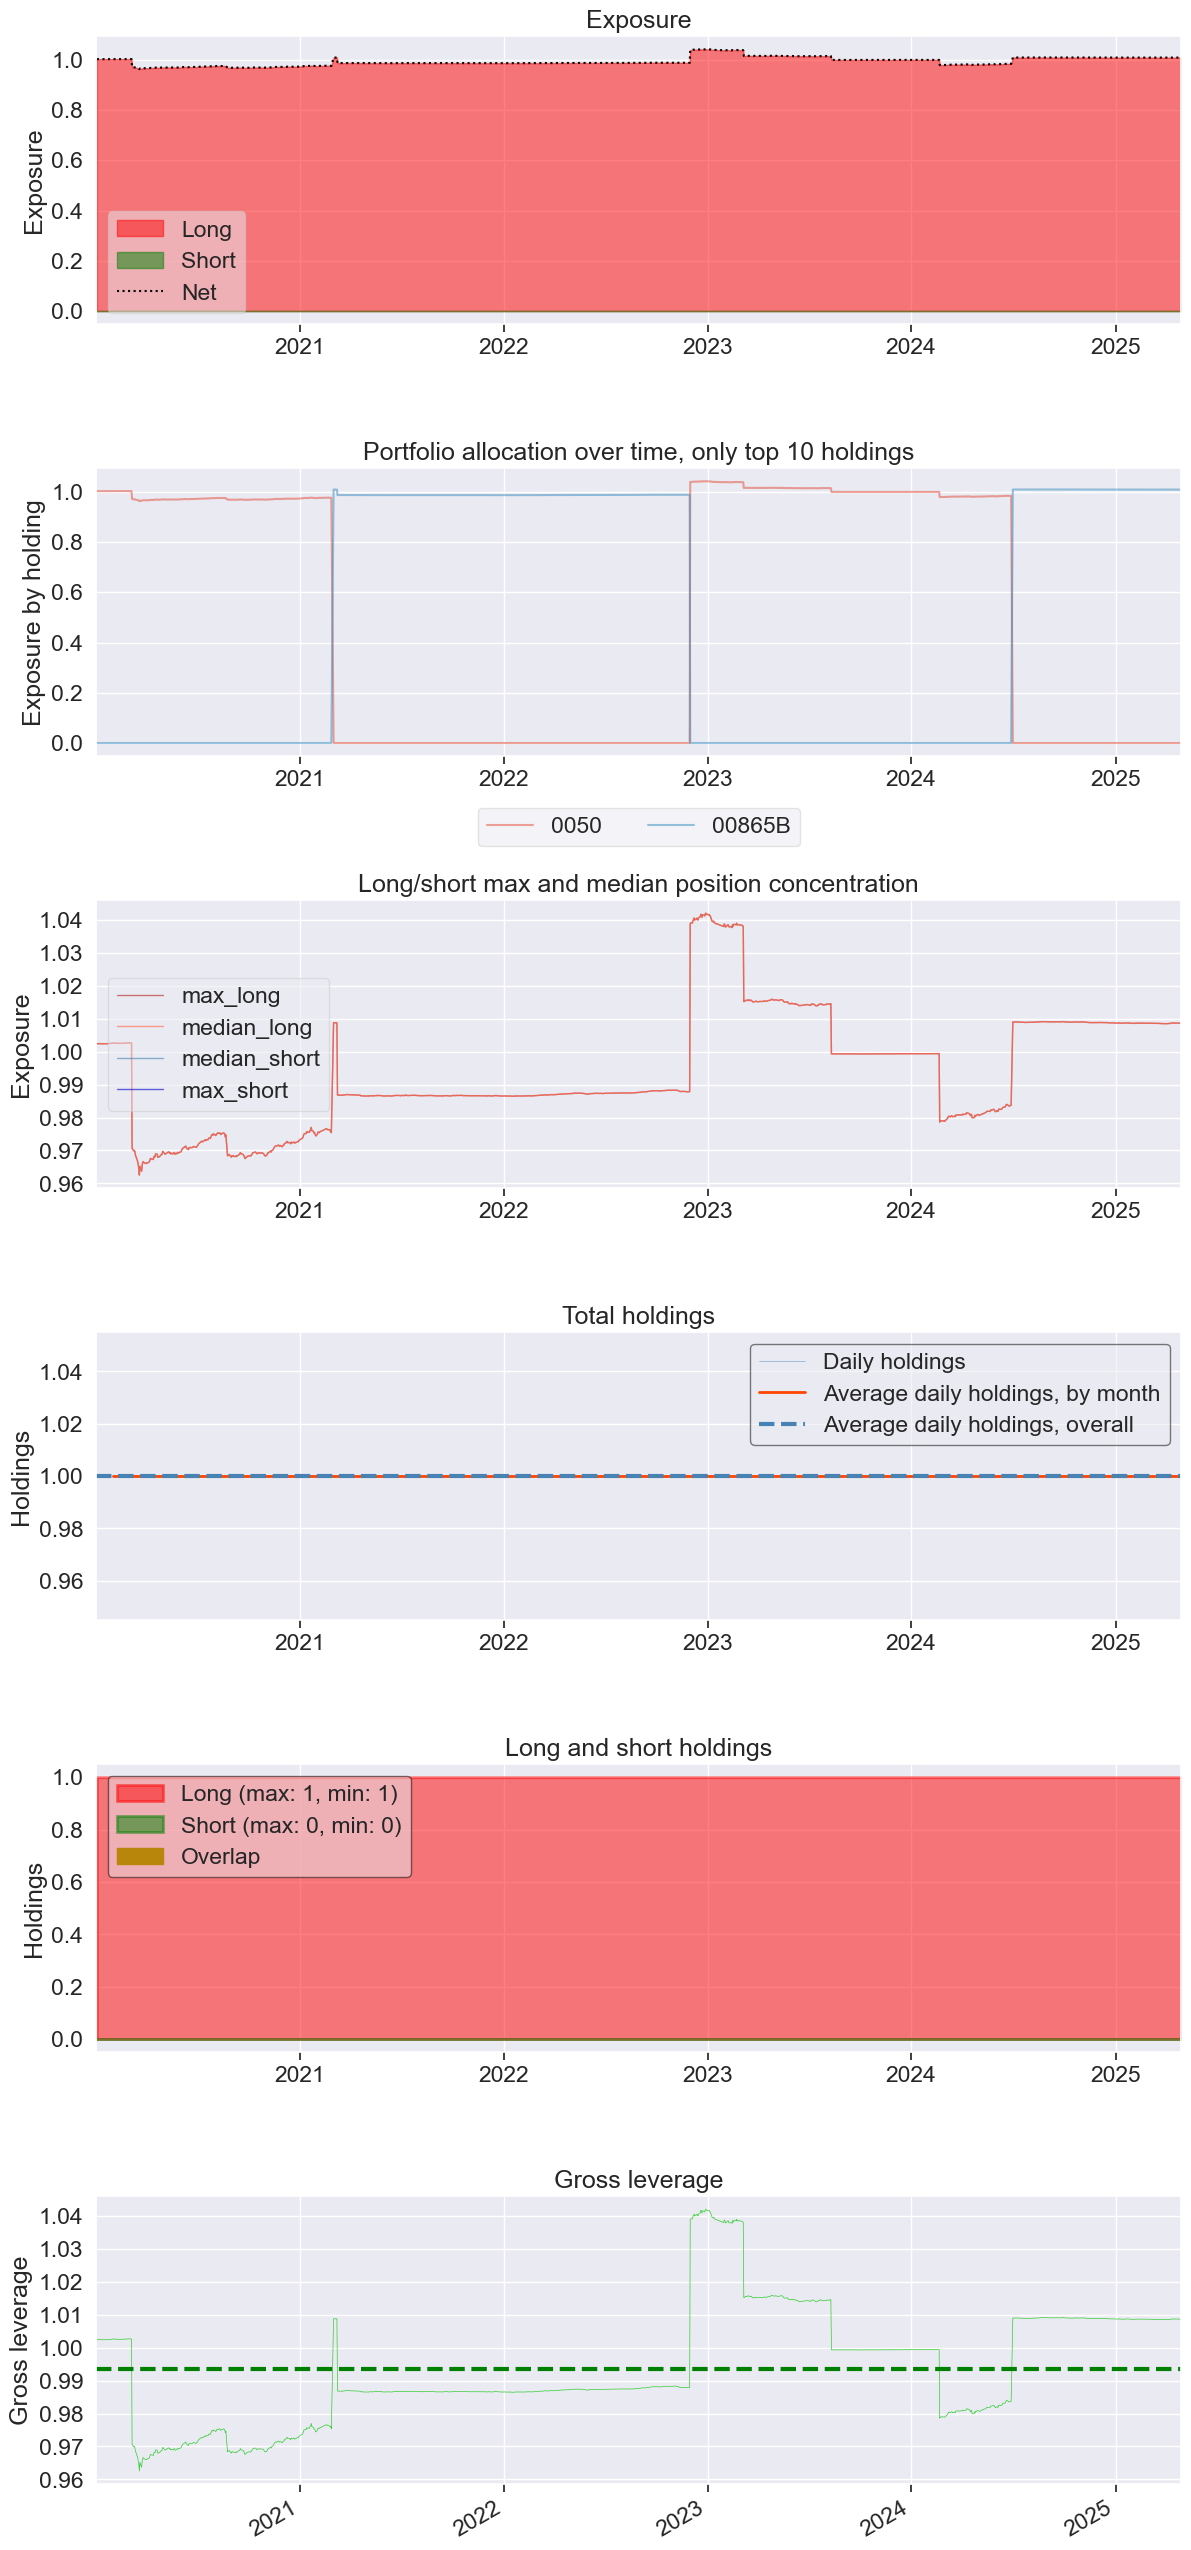

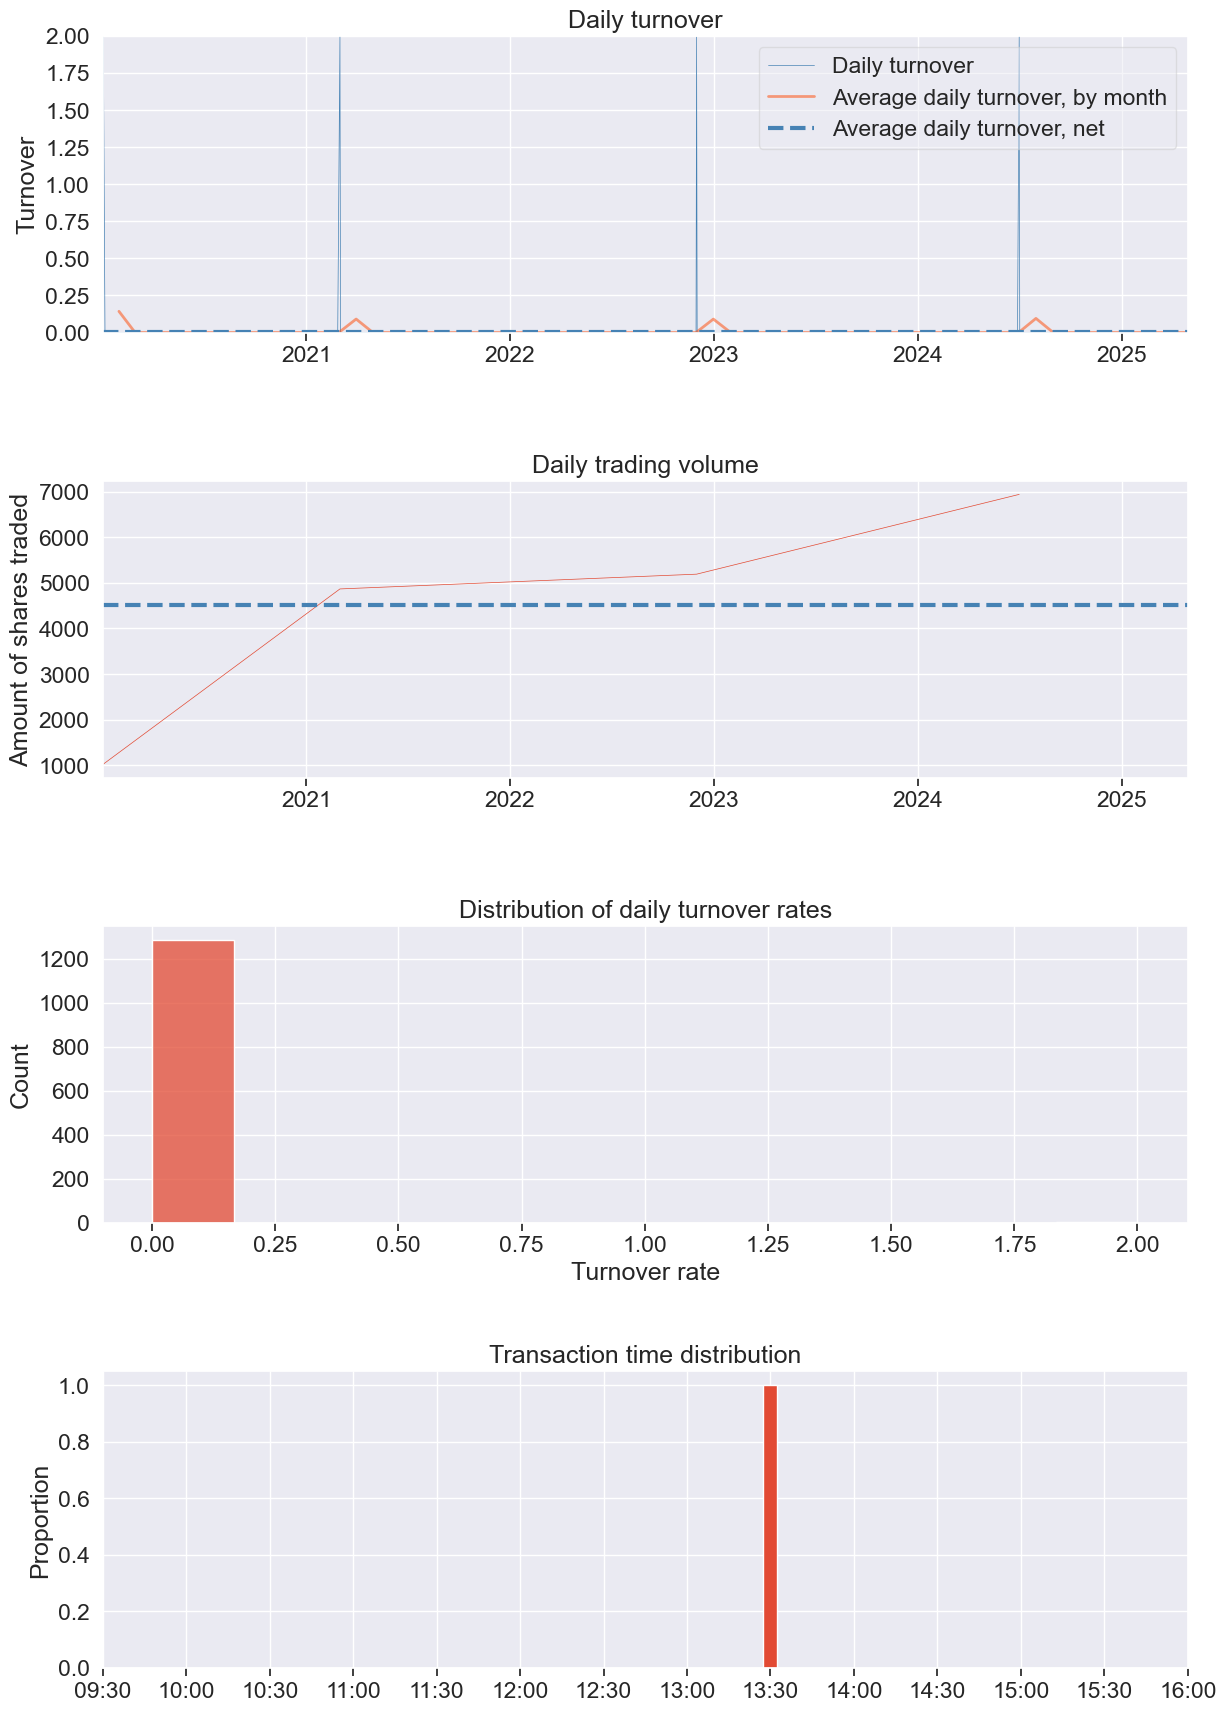

In [12]:
import pyfolio
from pyfolio.utils import extract_rets_pos_txn_from_zipline
plt.rcParams['font.sans-serif'] = ['Arial', 'Noto Sans CJK TC', 'SimHei']  
plt.rcParams['axes.unicode_minus'] = False  
returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)
benchmark_rets = results.benchmark_return
pyfolio.tears.create_full_tear_sheet(returns=returns,
                                     positions=positions,
                                     transactions=transactions,
                                     benchmark_rets=benchmark_rets
                                    )

In [132]:
positions.loc['2024-12-06 00:00:00+00:00':].head(10)

sid,Equity(0 [0050]),Equity(1 [00632R]),cash
index,,,
2024-12-06 00:00:00+00:00,0.0,199174.72,-2180.69
2024-12-09 00:00:00+00:00,0.0,199174.72,-2180.69
2024-12-10 00:00:00+00:00,0.0,199174.72,-2180.69
2024-12-11 00:00:00+00:00,0.0,1403938.88,-2180.69
2024-12-12 00:00:00+00:00,0.0,1389365.12,-2180.69
2024-12-13 00:00:00+00:00,0.0,1393615.80,-2180.69
2024-12-16 00:00:00+00:00,0.0,1397259.24,-2180.69
2024-12-17 00:00:00+00:00,0.0,1388150.64,-2180.69
2024-12-18 00:00:00+00:00,0.0,1386328.92,-2180.69


進入景氣循環
Date: 2020-01-02, Score: 27.0, 買進 0050
Date: 2021-02-26, Score: 40.0, 賣出 0050
Date: 2021-02-26, Score: 40.0，買入債券避險
Date: 2022-11-30, Score: 12.0, 買進 0050
Date: 2022-11-30, Score: 12.0，賣出債券
Date: 2024-06-28, Score: 38.0, 賣出 0050
Date: 2024-06-28, Score: 38.0，買入債券避險
進入景氣循環
Date: 2020-01-02, Score: 27.0, 買進 0050
Date: 2021-02-26, Score: 40.0, 賣出 0050
Date: 2022-11-30, Score: 12.0, 買進 0050
Date: 2024-06-28, Score: 38.0, 賣出 0050
進入景氣循環
Date: 2020-01-02, Score: 27.0, 買進 0050
Date: 2021-02-26, Score: 40.0, 賣出 0050
Date: 2021-02-26, Score: 40.0，買入債券避險
Date: 2022-11-30, Score: 12.0, 買進 0050
Date: 2022-11-30, Score: 12.0，賣出債券
Date: 2024-06-28, Score: 38.0, 賣出 0050
Date: 2024-06-28, Score: 38.0，買入債券避險
進入景氣循環
Date: 2020-01-02, Score: 27.0, 買進 0050
Date: 2021-02-26, Score: 40.0, 賣出 0050
Date: 2021-02-26, Score: 40.0，買入 0050反一
Date: 2022-11-30, Score: 12.0, 買進 0050
Date: 2022-11-30, Score: 12.0，賣出 0050 反一
Date: 2024-06-28, Score: 38.0, 賣出 0050
Date: 2024-06-28, Score: 38.0，買入 0050反一
進入景氣循環
Da

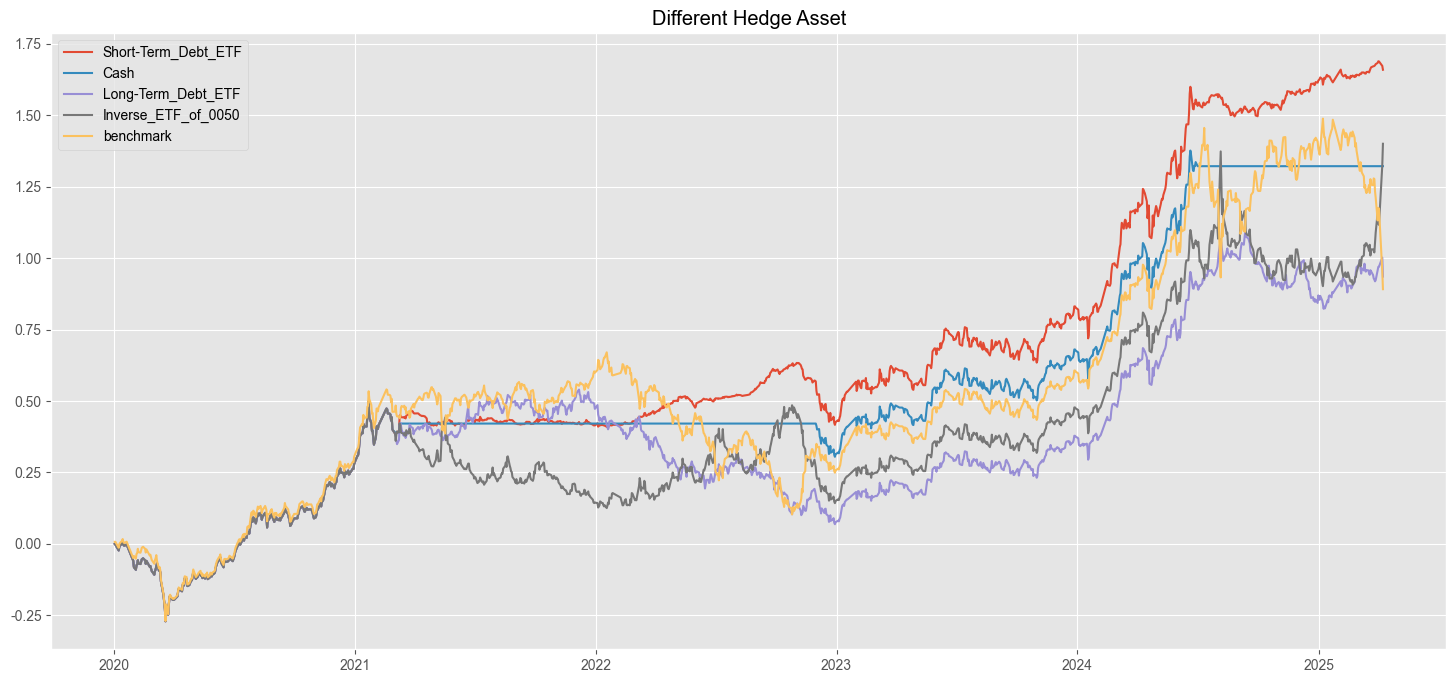

In [168]:
def initialize_2(context, pool = pool):
  set_slippage(slippage.TW_Slippage(spread = 0.3 , volume_limit = 1))
  set_commission(commission.Custom_TW_Commission(min_trade_cost=20, discount=1.0, tax = 0.003))
  set_benchmark(symbol('0050'))

  context.i = 0
  context.pool  = pool
  context.state = False
  context.score = None
  context.hedge_state = None

  context.buy_date = []
  context.sell_date = []

  context.a = 0
  context.b = 0

  context.bond = symbol('00865B')
  context.stock = symbol('0050')


metrods = [handle_data, handle_data_2, handle_data_3, handle_data_4, handle_data_5]
label = ['Short-Term_Debt_ETF', 'Cash', 'Long-Term_Debt_ETF', 'Inverse_ETF_of_0050', '50:50(short-term bond)']
algo = pd.DataFrame()

for idx, metrod in enumerate(metrods):

  def analyze_2(context, perf):
    algo[f'{label[idx]}'] = perf['algorithm_period_return']
    if idx == 0:
      algo['benchmark'] = perf['benchmark_period_return']


  results = run_algorithm(
            start = pd.Timestamp('2020-01-01', tz = 'utc'),
            end = pd.Timestamp('2025-04-08', tz = 'utc'),
            initialize = initialize_2,
            handle_data = metrod,
            analyze = analyze_2,
            bundle = 'tquant',
            capital_base = 1e5)
  


plt.figure(figsize = (18, 8))
plt.plot(algo.index, algo[f'{label[0]}'], label = label[0])
plt.plot(algo.index, algo[f'{label[1]}'], label = label[1])
plt.plot(algo.index, algo[f'{label[2]}'], label = label[2])
plt.plot(algo.index, algo[f'{label[3]}'], label = label[3])
#plt.plot(algo.index, algo[f'{label[4]}'], label = label[4])
plt.plot(algo.index, algo['benchmark'], label = 'benchmark')
plt.title('Different Hedge Asset')
plt.legend()
plt.show()

## 不同避險資產策略績效比較

接下來呈現的圖為**考慮不同避險資產的策略比較**：

- 原始策略（**紅色線**）：使用短天期美債 ETF（00865B）  
- 改變避險資產後的其他版本：
  - **藍色線**：持有現金  
  - **紫色線**：長天期美債 ETF（00687B）  
  - **灰色線**：0050 反向型 ETF（00664R）  
- **黃色線**：基準線，單純持有 0050（未擇時）

---

圖中顯示績效最好的依舊是**短天期美債**，其次為**0050 反向型 ETF**，再來是**現金**，表現最差的為**長天期美債**。

不過，這並不代表長天期美債的避險效果弱於其他資產，而是因為其價格除了受到利率變化影響，還會受到市場投資人對於**升息或降息的預期心理**所影響。因此，若要使用長天期美債作為避險資產，可能需要額外納入更多**數據與指標分析**進行評估。

---

### 關於 0050 反向型 ETF 的說明

績效第二好的為**0050 反向型 ETF**。不過讀者可以發現：

- 該策略之所以報酬突出，主要是因為**2025/04 川普關稅政策**造成短期內大盤大跌、反向 ETF 大漲。
- 從**波動度角度**來看，反向 ETF 策略是四者中最不穩定的。
- 此外，反向型 ETF 的資產結構中可能包含**期貨或其他衍生性商品**，長期持有會因為**換倉成本**與時間衰減（decay）而侵蝕報酬。

  **建議：**反向型 ETF 若作為避險工具，應控制持有期間，避免長期持有造成績效侵蝕。

---

總結來說，短天期美債提供了穩健又穩定的避險效果，而其他選項雖各具特色，但也存在更高的風險與操作複雜性，投資人應視自身風險承受度與投資週期進行選擇。


## 績效表格｜不同避險資產策略績效比較

| 避險資產              | Short Term Debt ETF | Long Term Debt ETF | Cash     | Inverse ETF of 0050 | Benchmark |
|-----------------------|---------------------|---------------------|----------|----------------------|-----------|
| **年化報酬率**         | 21.3%               | 13.9%               | 18.11%   | 18.89%               | 12.37%    |
| **累積報酬率**         | 165.9%              | 93.5%               | 132.2%   | 140%                 | 80.4%     |
| **波動度**            | 14.8%               | 17.7%               | 14.3%    | 20.9%                | 20.12%    |
| **夏普值**            | 1.38                | 0.83                | 1.23     | 0.93                 | 0.68      |
| **Alpha**             | 0.16                | 0.09                | 0.12     | 0.23                 | 0         |
| **Beta**              | 0.40                | 0.38                | 0.43     | –0.07                | 0.92      |

---

## 績效比較說明

從**夏普值**來看，表現最佳的依舊是**短天期美債 ETF**，達到了 **1.38**，且年化報酬率為 **21.3%**，這對於「擇時」策略來說是非常優異的結果。

次佳為 **持有現金**（夏普值 = **1.23**），再來是 **反向型 ETF**（夏普值 = **0.93**），最後則是 **長天期美債 ETF**（夏普值 = **0.83**）。

---

對投資人而言，這張表格提供了明確指引：

- **短債 ETF** 提供了最穩健的報酬與風險平衡，適合保守型或強調風險控制的策略設計。
- **反向 ETF** 雖然在某些時點具備高報酬潛力，但波動度高，且需注意長期持有的侵蝕效果。
- **現金部位** 在策略中雖不具備成長性，但作為下行保護與通膨對抗工具仍有相對吸引力。
- **長天期美債** 受預期心理與利率敏感度影響較大，不適合作為單一避險手段，需搭配更多判斷與時機操作。

> 建議：選擇避險資產應依據個人風險承受度、策略週期長短、以及對市場波動的理解做調整。
